In [1]:
import numpy as np

from matplotlib import pyplot as plt

In [2]:
from zenbu import Zenbu

In [3]:
k, p = np.loadtxt("Pk_Planck15_Table4.txt", unpack=True)
zen  = Zenbu(k, p, jn = 15)
zen.make_ptable(kmin=3e-3, kmax = 1.0)

In [8]:
# Let's explicitly list the components
# Note that the cross spectra are multiplied by a factor of one half.

kv = zen.pktable[:,0]

spectra = {\
          r'$(1,1)$':zen.pktable[:,1],\
          r'$(1,b_1)$':zen.pktable[:,2], r'$(b_1,b_1)$': zen.pktable[:,3],\
          r'$(1,b_2)$':zen.pktable[:,4], r'$(b_1,b_2)$': zen.pktable[:,5],  r'$(b_2,b_2)$': zen.pktable[:,6],\
          r'$(1,b_s)$':zen.pktable[:,7], r'$(b_1,b_s)$': zen.pktable[:,8],  r'$(b_2,b_s)$': zen.pktable[:,9], r'$(b_s,b_s)$':zen.pktable[:,10],\
          }

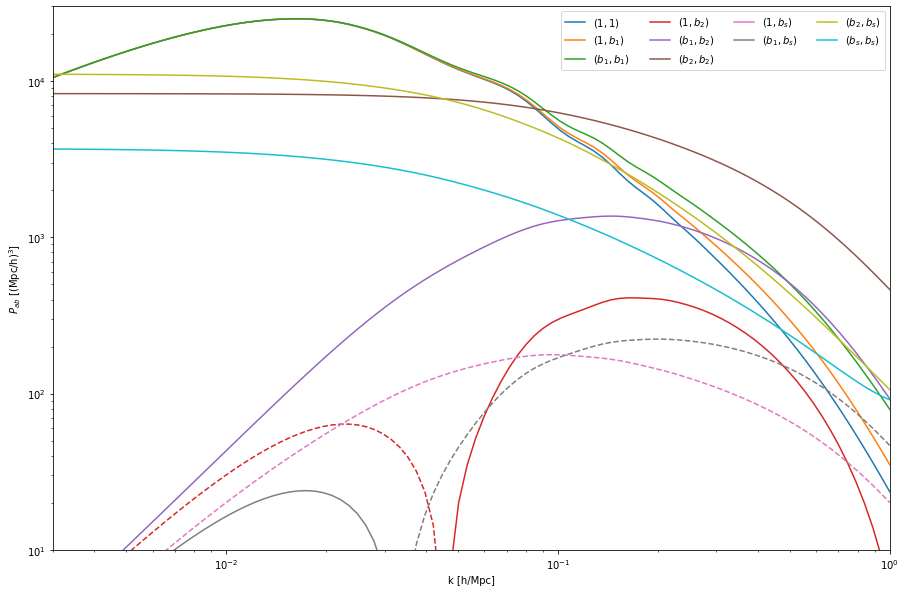

In [13]:
# Plot some stuffs
plt.figure(figsize=(15,10))

spec_names = spectra.keys()

for ii, spec_name in enumerate(spec_names):    
    plt.loglog(kv, spectra[spec_name],'C'+str(ii), label=spec_name)
    plt.loglog(kv, -spectra[spec_name],'C'+str(ii)+'--')

plt.xlim(3e-3, 1)    
plt.ylim(10,3e4)
plt.legend(ncol=4)
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P_{ab}$ [(Mpc/h)$^3$]')  
plt.show()